In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://github.com/alura-cursos/challenge2-data-science/blob/main/TelecomX_Data.json?raw=true'

In [ ]:
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df['Churn'] = df.Churn.map({'Yes': True, 'No': False})
df['Churn'] = df.Churn.astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   bool  
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: bool(1), object(5)
memory usage: 291.1+ KB


In [ ]:
colunas = ['customer','phone' , 'internet', 'account']

frames = {}

for col in colunas:
  df_json = pd.json_normalize(df[col])
  frames[col] = df_json


In [ ]:
for key, frame in frames.items():
 for col in frame.columns:
  df[col] = frame[col]

df.drop(colunas, axis=1, inplace=True)

In [ ]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,False,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,True,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,True,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,True,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,True,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,False,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,False,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
# conversoes de tipos, filtrar valores nao computaveis.
# len(col) - DataFrame.count() = na elements
# DataFrame.describe() estatisticas descritivas
# DataFrame.value.counts()
# DataFrame.dropna()
# DataFrame.isna(), notna()
# DataFrame.sort_values()
# DataFrame.explode()
# DataFrame.T()
# DataFrame.compare()

In [ ]:
def cleanBool(x: str):
  if x == 'Yes' or x == 1:
    return True
  elif x == 'No' or x == 0 or x == "No phone service":
    return False
  else:
    return x

df = df.map(lambda x: cleanBool(x))
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.60,593.3
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.4
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,False,False,False,13,True,False,DSL,...,False,False,True,False,False,One year,False,Mailed check,55.15,742.9
7263,9992-RRAMN,True,Male,False,True,False,22,True,True,Fiber optic,...,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.7
7264,9992-UJOEL,False,Male,False,False,False,2,True,False,DSL,...,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75
7265,9993-LHIEB,False,Male,False,True,True,67,True,False,DSL,...,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65


In [ ]:
na_elements = df.isna().sum()
na_elements

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
duplicated_values = {}
for col in df.columns:
  duplicated_rows = df[col].duplicated().sum()


  duplicated_values[col] = duplicated_rows

print(f"{[x for x in duplicated_values.items()]}\n")



[('customerID', np.int64(0)), ('Churn', np.int64(7265)), ('gender', np.int64(7265)), ('SeniorCitizen', np.int64(7265)), ('Partner', np.int64(7265)), ('Dependents', np.int64(7265)), ('tenure', np.int64(7194)), ('PhoneService', np.int64(7265)), ('MultipleLines', np.int64(7265)), ('InternetService', np.int64(7264)), ('OnlineSecurity', np.int64(7264)), ('OnlineBackup', np.int64(7264)), ('DeviceProtection', np.int64(7264)), ('TechSupport', np.int64(7264)), ('StreamingTV', np.int64(7264)), ('StreamingMovies', np.int64(7264)), ('Contract', np.int64(7264)), ('PaperlessBilling', np.int64(7265)), ('PaymentMethod', np.int64(7263)), ('Charges.Monthly', np.int64(5682)), ('Charges.Total', np.int64(736))]



In [ ]:
cols_int = ["tenure"]
cols_float = ["Charges.Monthly", "Charges.Total"]
cols_bool = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

In [ ]:
from numpy import int64, float64

df[cols_int] = df[cols_int].astype(int64)



df[cols_bool] = df[cols_bool].astype(bool)


In [ ]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Total'] = df['Charges.Total'].astype(float64)

In [ ]:
df['OnlineBackup'] = df['OnlineBackup'].astype(bool)
df['OnlineSecurity'] = df['OnlineSecurity'].astype(bool)
df['TechSupport'] = df['TechSupport'].astype(bool)
df['StreamingMovies'] = df['StreamingMovies'].astype(bool)
df['StreamingTV'] = df['StreamingTV'].astype(bool)
df['DeviceProtection'] = df['DeviceProtection'].astype(bool)

In [ ]:
from scipy.stats import skew, kurtosis

# Convert 'Charges.Total' to numeric, coercing errors
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Fill NaN values in 'Charges.Total' with 0 (or another appropriate value)
df['Charges.Total'] = df['Charges.Total'].fillna(0)

# 2. Seleção das colunas numéricas relevantes
# ---------------------------------------------------------
numeric_cols = [
    "tenure",
    "Charges.Monthly",
    "Charges.Total",
    "SeniorCitizen"
]

# ---------------------------------------------------------
# 3. Média, mediana e desvio‑padrão (visão geral)
# ---------------------------------------------------------
basic_stats = df[numeric_cols].agg(['mean', 'median', 'std']).T
print("\n==== Estatísticas gerais ====")
print(basic_stats)

# ---------------------------------------------------------
# 4. (Opcional) Mesmas métricas, mas quebradas por Churn
# ---------------------------------------------------------
stats_by_churn = df.groupby("Churn")[numeric_cols].agg(['mean', 'median', 'std'])
print("\n==== Estatísticas por Churn ====")
print(stats_by_churn)


==== Estatísticas gerais ====
                        mean  median          std
tenure             32.346498    29.0    24.571773
Charges.Monthly    64.720098    70.3    30.129572
Charges.Total    2277.182035  1389.2  2268.648587
SeniorCitizen       0.162653     0.0     0.369074

==== Estatísticas por Churn ====
          tenure                   Charges.Monthly                     \
            mean median        std            mean  median        std   
Churn                                                                   
False  37.569965   38.0  24.113777       61.265124  64.425  31.092648   
True   19.433827   11.0  20.613094       73.260965  79.250  25.688977   

      Charges.Total                        SeniorCitizen                   
               mean    median          std          mean median       std  
Churn                                                                      
False   2549.911442  1679.525  2329.954215      0.128721    0.0  0.334923  
True    1602.98

In [ ]:
print(df['Charges.Total'].unique())

[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


In [ ]:
df['Churn'].value_counts()

,count
Churn,
False,5174
True,2093


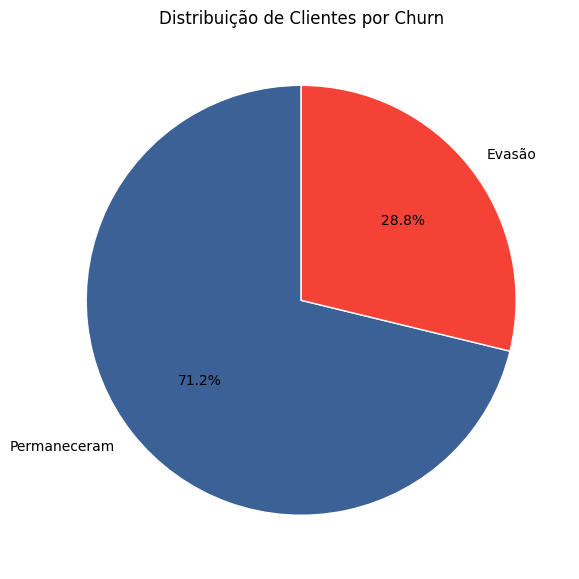

In [98]:
import matplotlib.pyplot as plt

# Dados
labels = ['Permaneceram', 'Evasão']
sizes = [5174, 2093]

# (Opcional) Cores personalizadas para cada fatia
colors = ['#3c6196',   # azul para clientes que permaneceram
          '#f44336']   # vermelho para clientes que saíram

# Criação do gráfico
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',      # Mostra porcentagem com uma casa decimal
    startangle=90,          # Começa a desenhar a partir do topo
    colors=colors,
    wedgeprops={'edgecolor': 'white'}  # Deixa contornos brancos
)

# Título
ax.set_title('Distribuição de Clientes por Churn')

# Salvando como PNG
plt.savefig('Distribuição de Clientes por Churn', dpi=300, bbox_inches='tight')

# Ajusta o layout e exibe
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035
std,24.571773,30.129572,2268.648587
min,0.000000,18.250000,0.000000
25%,9.000000,35.425000,396.200000
50%,29.000000,70.300000,1389.200000
75%,55.000000,89.875000,3778.525000
max,72.000000,118.750000,8684.800000


In [ ]:
#Distribuição de churn por gênero
churn_por_genero = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
print(churn_por_genero)

import matplotlib.pyplot as plt

Churn      False     True 
gender                    
Female  0.709633  0.290367
Male    0.714286  0.285714


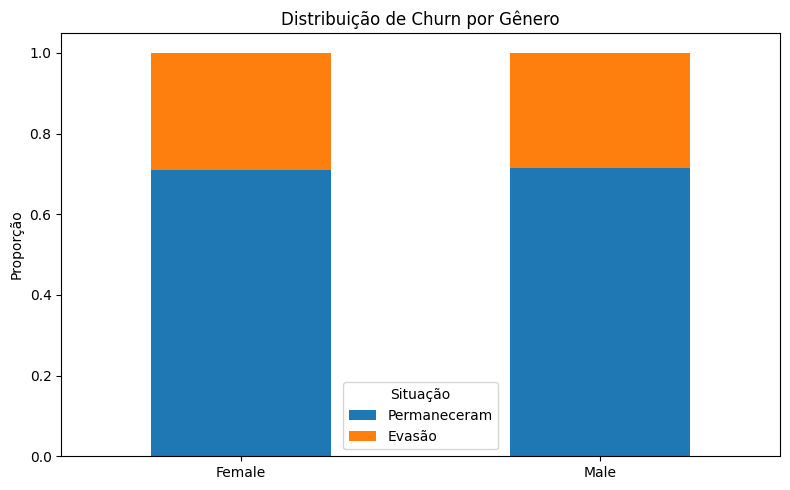

In [101]:
# ----------------- Tabela percentual -----------------
churn_por_genero = (
    df.groupby("gender")["Churn"]
      .value_counts(normalize=True)   # fração dentro do gênero
      .unstack()                      # colunas = False / True
)

# Renomeia as colunas para legenda amigável
churn_por_genero = churn_por_genero.rename(
    columns={False: "Permaneceram", True: "Evasão"}
)

# ----------------- Plotagem -----------------
ax = churn_por_genero.plot(kind="bar",
                           stacked=True,
                           figsize=(8, 5))

ax.set_title("Distribuição de Churn por Gênero")
ax.set_xlabel("")                     # opcional — deixa só o gênero no eixo
ax.set_ylabel("Proporção")

# Legenda com os nomes desejados
ax.legend(title="Situação")

plt.xticks(rotation=0)
plt.tight_layout()

# Salvando como PNG
plt.savefig('Distribuição de Churn por Gênero', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
#Distribuição por tipo de contrato
churn_por_contrato = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print(churn_por_contrato)

Churn              False     True 
Contract                          
Month-to-month  0.554307  0.445693
One year        0.860434  0.139566
Two year        0.944923  0.055077


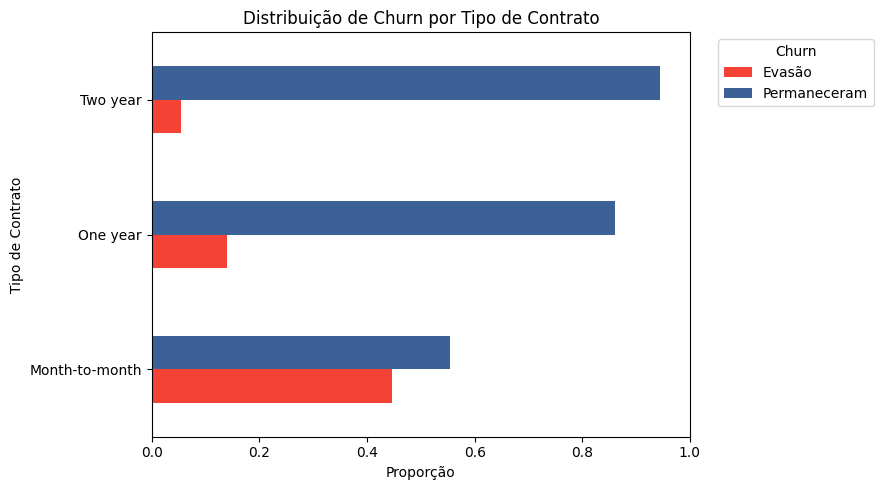

In [100]:
dados = {
    "Contract": ["Month-to-month", "One year", "Two year"],
    "Evasão": [0.445693, 0.139566, 0.055077],
    "Permaneceram": [0.554307, 0.860434, 0.944923]
}

df_churn = (pd
      .DataFrame(dados)
      .set_index("Contract")
      .rename_axis(None))          # remove o nome do eixo para deixar mais limpo

# ---------------------------------------------------------
# 2) Gráfico de barras HORIZONTAIS, NÃO empilhadas
# ---------------------------------------------------------
ax = df_churn.plot(kind="barh",
             stacked=False,        # garante que não empilhe
             figsize=(9, 5),
             color=["#f44336",     # vermelho  → Evasão
                    "#3c6196"])    # azul     → Permaneceram

ax.set_title("Distribuição de Churn por Tipo de Contrato")
ax.set_xlabel("Proporção")
ax.set_ylabel("Tipo de Contrato")
ax.set_xlim(0, 1)                  # cada linha soma 1 (100 %)
ax.legend(title="Churn",
          bbox_to_anchor=(1.04, 1), loc="upper left")   # legenda fora do gráfico

plt.tight_layout()

# Salvando como PNG
plt.savefig('Distribuição de Churn por Tipo de Contrato', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
#Distribuição por churn x idoso
churn_por_idade = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
print(churn_por_idade)

Churn             False     True 
SeniorCitizen                    
False          0.740838  0.259162
True           0.563452  0.436548


/tmp/ipython-input-102-2183798084.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  proporcao_idosos = df_evasao['SeniorCitizen'].value_counts(normalize=True).get(1, 0)


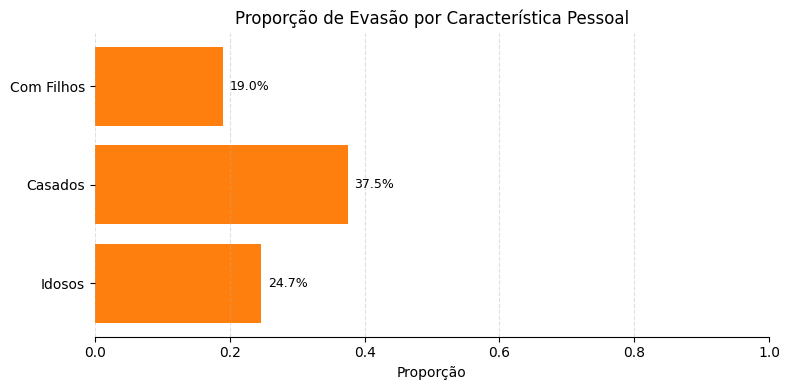

In [102]:
# Filtra apenas os clientes que saíram (churn = True)
df_evasao = df[df['Churn'] == True].copy()

# Calcula a proporção de churners que possuem cada característica
proporcao_idosos = df_evasao['SeniorCitizen'].value_counts(normalize=True).get(1, 0)
proporcao_casados = df_evasao['Partner'].value_counts(normalize=True).get(True, 0)
proporcao_dependentes = df_evasao['Dependents'].value_counts(normalize=True).get(True, 0)

# Organiza os dados
dados = {
    'Idosos': proporcao_idosos,
    'Casados': proporcao_casados,
    'Com Filhos': proporcao_dependentes
}

df_dados = pd.DataFrame.from_dict(dados, orient='index', columns=['Proporção'])

# Gráfico
plt.figure(figsize=(8, 4))
plt.barh(df_dados.index, df_dados['Proporção'], color='#ff7f0e')

plt.title('Proporção de Evasão por Característica Pessoal')
plt.xlabel('Proporção')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Adiciona texto nas barras
for i, valor in enumerate(df_dados['Proporção']):
    plt.text(valor + 0.01, i, f'{valor:.1%}', va='center', fontsize=9)

plt.tight_layout()

# Salvando como PNG
plt.savefig('Distribuição de Churn por Característica Pessoal', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.60,593.30
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,False,False,False,13,True,False,DSL,...,False,False,True,False,False,One year,False,Mailed check,55.15,742.90
7263,9992-RRAMN,True,Male,False,True,False,22,True,True,Fiber optic,...,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70
7264,9992-UJOEL,False,Male,False,False,False,2,True,False,DSL,...,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75
7265,9993-LHIEB,False,Male,False,True,True,67,True,False,DSL,...,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65


In [ ]:
#Distribuição por método de pagamento
churn_por_pagamento = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
print(churn_por_pagamento)

Churn                         False     True 
PaymentMethod                                
Bank transfer (automatic)  0.809314  0.190686
Credit card (automatic)    0.822704  0.177296
Electronic check           0.529243  0.470757
Mailed check               0.783183  0.216817


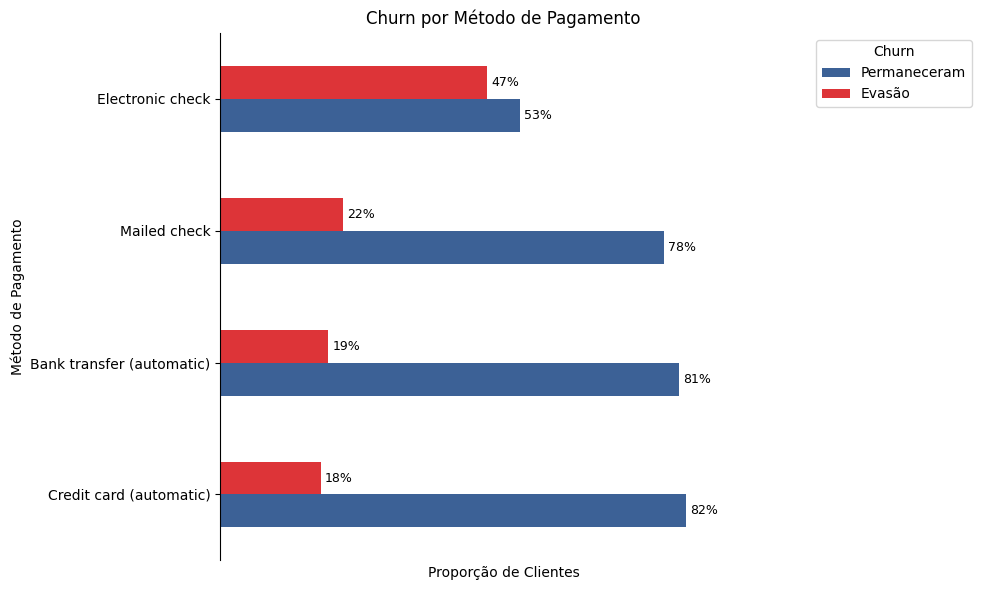

In [103]:
# Dados fornecidos (proporções)
plot_df = pd.DataFrame({
    'Permaneceram': {
        'Bank transfer (automatic)': 0.809314,
        'Credit card (automatic)': 0.822704,
        'Electronic check': 0.529243,
        'Mailed check': 0.783183
    },
    'Evasão': {
        'Bank transfer (automatic)': 0.190686,
        'Credit card (automatic)': 0.177296,
        'Electronic check': 0.470757,
        'Mailed check': 0.216817
    }
})

# Ordena para deixar métodos com menos churn no topo (opcional)
plot_df = plot_df.sort_values(by='Evasão', ascending=True)

# Cria o gráfico de barras horizontais
ax = plot_df.plot(kind="barh",
                  stacked=False,
                  figsize=(10, 6),
                  color=["#3C6196", "#DD3438"])  # Azul = permaneceram, vermelho = evasão

# Títulos e rótulos
ax.set_title("Churn por Método de Pagamento")
ax.set_xlabel("Proporção de Clientes")
ax.set_ylabel("Método de Pagamento")
ax.set_xlim(0, 1)

# Remove bordas
for spine in ["top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legenda
ax.legend(title="Churn", bbox_to_anchor=(1.04, 1), loc="upper left")

# Adiciona os valores nas barras
for container in ax.containers:
    labels = [f'{v.get_width() * 100:.0f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=9, padding=3)

# Remove as marcas (ticks) do eixo X
ax.xaxis.set_ticks_position('none')  # remove as linhas de tick
ax.set_xticks([])                    # remove os rótulos de tick

plt.tight_layout()

# Salvando como PNG
plt.savefig('Distribuição de Churn por Método de Pagamento', dpi=300, bbox_inches='tight')

plt.show()




==== Distribuição por Método de Pagamento ====
                           Total
PaymentMethod                   
Credit card (automatic)     1568
Bank transfer (automatic)   1589
Mailed check                1665
Electronic check            2445


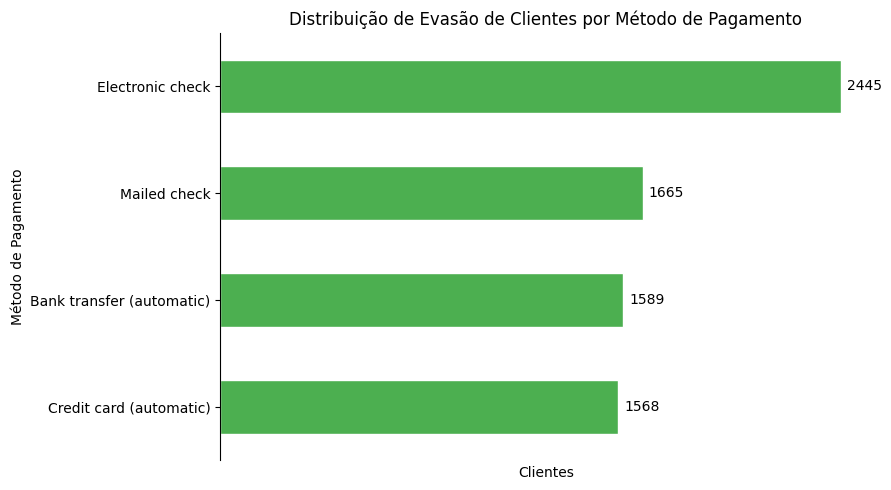

In [104]:
# Tabela de frequência – apenas absoluta
counts = df["PaymentMethod"].value_counts().sort_values(ascending=True)  # ordem crescente para barras horizontais

dist_pm = pd.DataFrame({"Total": counts})

print("\n==== Distribuição por Método de Pagamento ====")
print(dist_pm)

# ---------------------------------------------------------
# Gráfico de barras HORIZONTAIS (contagem absoluta)
# ---------------------------------------------------------
ax = counts.plot(kind="barh",
                 figsize=(9, 5),
                 color="#4caf50",
                 edgecolor="white")

ax.set_title("Distribuição de Evasão de Clientes por Método de Pagamento")
ax.set_xlabel("Clientes")
ax.set_ylabel("Método de Pagamento")

# Remove as bordas (spines) superior, inferior e direita
for spine in ["top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Adiciona rótulo com a contagem absoluta ao lado de cada barra
for i, value in enumerate(counts):
    ax.text(value + counts.max()*0.01, i, str(int(value)), va="center")

# Remove as marcas (ticks) do eixo X
ax.xaxis.set_ticks_position('none')  # remove as linhas de tick
ax.set_xticks([])                    # remove os rótulos de tick

plt.tight_layout()

# Salvando como PNG
plt.savefig('Distribuição de evasão de clientes por método de pagamento', dpi=300, bbox_inches='tight')

plt.show()




```
# conversões de tipos, filtrar valores não computáveis
import pandas as pd

df = pd.DataFrame({'col1': [1, 2, '3', None, 'NaN']})
df['col1'] = pd.to_numeric(df['col1'], errors='coerce')  # Converte para número, substitui erros por NaN
df.dropna()  # Remove valores NaN

# len(col) - DataFrame.count() = na elements
# Conta a quantidade de elementos NaN na coluna
na_elements = len(df['col1']) - df['col1'].count()

# DataFrame.describe() estatísticas descritivas
df.describe()  # Exibe estatísticas gerais dos dados numéricos

# DataFrame.value_counts()
df['col1'].value_counts()  # Conta a frequência dos valores únicos

# DataFrame.dropna()
df.dropna()  # Remove linhas que contêm NaN

# DataFrame.isna(), notna()
df.isna()  # Retorna True para valores NaN
df.notna()  # Retorna True para valores válidos

# DataFrame.sort_values()
df.sort_values(by='col1')  # Ordena valores na coluna

# DataFrame.explode()
df_explode = pd.DataFrame({'A': [[1, 2], [3, 4], [5]]})
df_explode.explode('A')  # Transforma listas em linhas individuais

# DataFrame.T()
df.T  # Transpõe o DataFrame

# DataFrame.compare()
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [1, 2], 'B': [3, 5]})
df1.compare(df2)  # Compara as diferenças entre dois DataFrames
```



In [ ]:
#Distribuição por total de gasto
churn_por_total_de_gasto = df.groupby('Charges.Total')['Churn'].value_counts(normalize=True).unstack()
print(churn_por_total_de_gasto)

Churn          False  True 
Charges.Total              
0.00             1.0    NaN
18.80            1.0    NaN
18.85            0.5    0.5
18.90            0.5    0.5
19.00            1.0    NaN
...              ...    ...
8564.75          1.0    NaN
8594.40          1.0    NaN
8670.10          1.0    NaN
8672.45          1.0    NaN
8684.80          NaN    1.0

[6531 rows x 2 columns]


In [ ]:
df["Charges.Total"] = pd.to_numeric(df["Charges.Total"], errors="coerce")
evasao = df[df["Churn"] == True]["Charges.Total"].dropna()
evasao = evasao.sort_values(ascending=True)
step = (evasao.max() - evasao.min()) / 20
i = 0
evasao_por_custo = []
grupos = {}
for client in evasao:
  evasao_por_custo.append(client)
  if client >= step:
    grupos[f"{i + 1}"] = evasao_por_custo
    evasao_por_custo = []
    i += 1
    step += step

df_evasao = pd.DataFrame([grupos])

i = 0
grupos_count = {}
for row in df_evasao:
  for item in df_evasao[row]:
    grupos_count[f"{i + 1}"] = len(item)
    i += 1

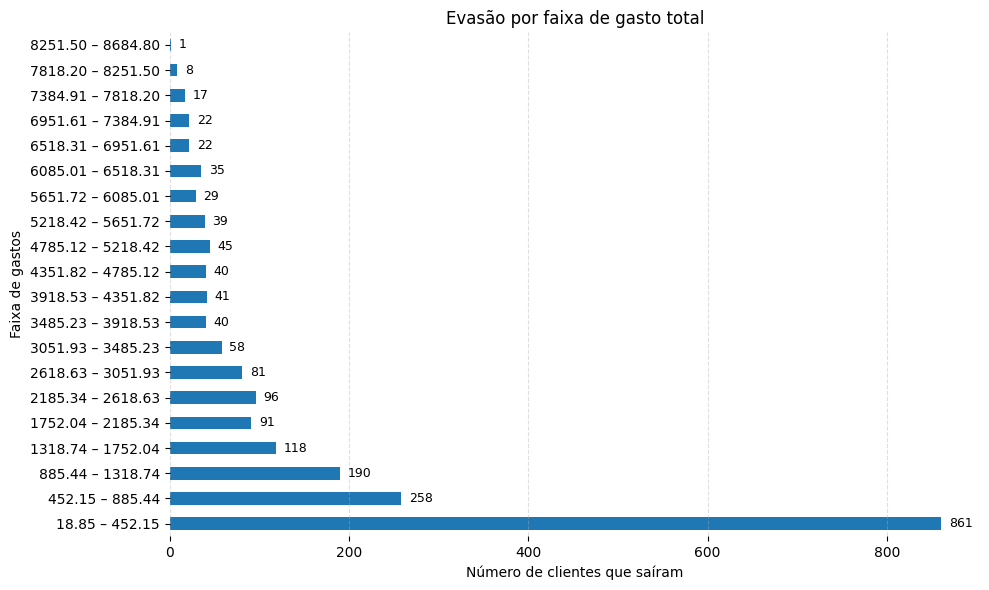

In [105]:
# 1) Garantir que Charges.Total seja numérico
df["Charges.Total"] = pd.to_numeric(df["Charges.Total"], errors="coerce")

# 2) Selecionar apenas quem saiu do serviço
evasao = df.loc[df["Churn"], "Charges.Total"].dropna()

# 3) Criar 20 faixas (bins) de mesmo tamanho
n_bins = 20
bins = np.linspace(evasao.min(), evasao.max(), n_bins + 1)
labels = [f"{bins[i]:.2f} – {bins[i+1]:.2f}" for i in range(n_bins)]

# 4) Binarizar e contar
evasao_binned = pd.cut(evasao, bins=bins, labels=labels,
                       include_lowest=True, right=False)
contagens = evasao_binned.value_counts().sort_index()

# 5) Gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 6))
contagens.plot(kind="barh", ax=ax)

ax.set_xlabel("Número de clientes que saíram")
ax.set_ylabel("Faixa de gastos")
ax.set_title("Evasão por faixa de gasto total")

# 6) Rótulos nas barras  → número exato de clientes
offset = contagens.max() * 0.01  # pequeno deslocamento à direita
for patch in ax.patches:          # cada barra do gráfico
    width = patch.get_width()
    ycent = patch.get_y() + patch.get_height() / 2
    ax.text(width + offset, ycent, f"{int(width)}",
            va="center", ha="left", fontsize=9)

# 7) Remover todas as bordas e adicionar grade leve
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)
ax.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()

# Salvando como PNG
plt.savefig('Evasão por faixa de gasto total', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# ------------------------------------------------------------------
# 1) Liste as colunas de serviço a analisar
# ------------------------------------------------------------------
servicos = [
    "PhoneService", "MultipleLines", "InternetService",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

# ------------------------------------------------------------------
# 2) Crie um DataFrame booleano onde:
#       True  -> o cliente usa o serviço
#       False -> não usa  (valor começa com "No", "no …", False, 0, NaN…)
# ------------------------------------------------------------------
def usa_servico(valor) -> bool:
    """Devolve True se o cliente realmente usa o serviço."""
    if pd.isna(valor):                 # NaN  ->  não usa
        return False
    if isinstance(valor, bool):        # booleans vêm prontos
        return valor
    if isinstance(valor, (int, float)):
        return bool(valor)             # 1 = usa, 0 = não usa

    s = str(valor).strip().lower()
    return not s.startswith("no")      # 'no', 'no phone service', 'no internet service' → False

df_serv_bool = df[servicos].applymap(usa_servico)

# ------------------------------------------------------------------
# 3) Filtre apenas os clientes que saíram (Churn == True)
# ------------------------------------------------------------------
mask_churn = df["Churn"] == True

# ------------------------------------------------------------------
# 4) Conte quantos churners usam cada serviço
# ------------------------------------------------------------------
evasao_por_servico = (
    df_serv_bool[mask_churn]     # mantém só churners
      .sum()                    # soma True = 1
      .sort_values(ascending=False)
)

# ------------------------------------------------------------------
# 5) Resultado
# ------------------------------------------------------------------
print("Quantidade de churners que usavam cada serviço:")
print(evasao_por_servico)


Quantidade de churners que usavam cada serviço:
InternetService     1925
PhoneService        1898
StreamingMovies     1070
StreamingTV         1065
MultipleLines        944
DeviceProtection     782
OnlineBackup         766
TechSupport          538
OnlineSecurity       522
dtype: int64


/tmp/ipython-input-92-3522570596.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_serv_bool = df[servicos].applymap(usa_servico)


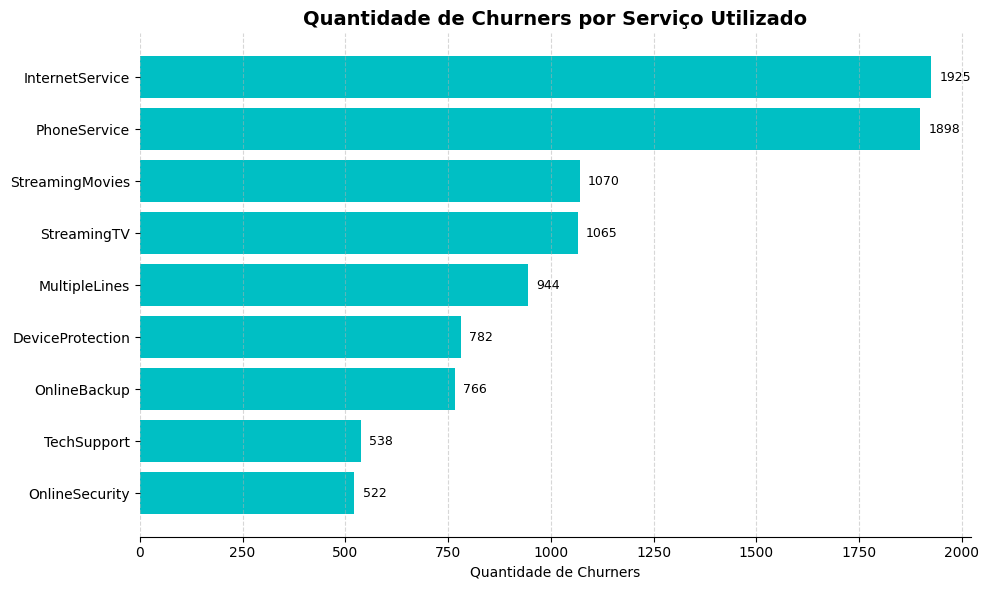

In [106]:
# Dados fornecidos
dados = {
    'InternetService': 1925,
    'PhoneService': 1898,
    'StreamingMovies': 1070,
    'StreamingTV': 1065,
    'MultipleLines': 944,
    'DeviceProtection': 782,
    'OnlineBackup': 766,
    'TechSupport': 538,
    'OnlineSecurity': 522
}

# Ordena os dados por valor
dados_ordenados = dict(sorted(dados.items(), key=lambda item: item[1]))

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(list(dados_ordenados.keys()), list(dados_ordenados.values()), color='#00bfc4')

# Estilo do gráfico
plt.title('Quantidade de Churners por Serviço Utilizado', fontsize=14, weight='bold')
plt.xlabel('Quantidade de Churners')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Exibir valores nas barras
for i, (servico, qtd) in enumerate(dados_ordenados.items()):
    plt.text(qtd + 20, i, str(qtd), va='center', fontsize=9)

plt.tight_layout()

# Salvando como PNG
plt.savefig('Quantidade de churners por serviço utilizado', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# tenure x churn

tenure = df.groupby('tenure')['Churn'].value_counts(normalize=True).unstack()
print(tenure)
# remove first entry of tenure
tenure = tenure.iloc[1:]
# change tenure from false/true to evasão e permanceram
tenure = tenure.rename(columns={False: "Permaneceram", True: "Evasão"})
# change tenure from tenure to Tempo de Contrato
tenure = tenure.rename_axis('Tempo de Contrato')



Churn      False     True 
tenure                    
0       1.000000       NaN
1       0.367508  0.632492
2       0.467480  0.532520
3       0.512077  0.487923
4       0.502703  0.497297
...          ...       ...
68      0.875000  0.125000
69      0.870000  0.130000
70      0.885246  0.114754
71      0.931818  0.068182
72      0.964770  0.035230

[73 rows x 2 columns]


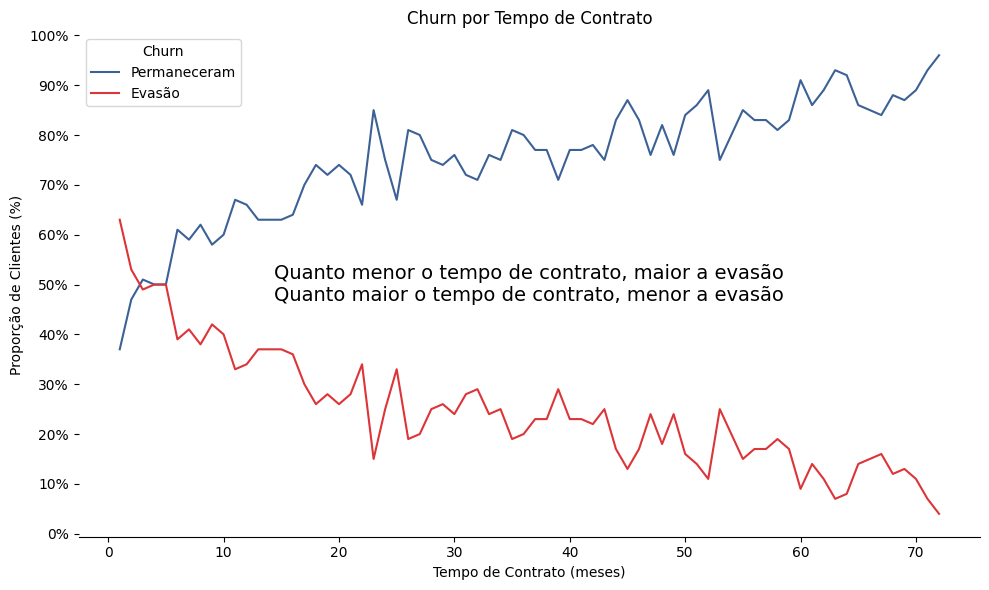

In [108]:
# Agrupa e calcula proporções de churn por tenure
tenure = df.groupby('tenure')['Churn'].value_counts(normalize=True).unstack()

# Remove tenure = 0
tenure = tenure.iloc[1:]

# Renomeia colunas e eixo
tenure = tenure.rename(columns={False: "Permaneceram", True: "Evasão"})
tenure = tenure.rename_axis('Tempo de Contrato (meses)', axis=0)

# Arredonda e converte para %
tenure = tenure.sort_index().round(2).mul(100)

# Cria o gráfico
ax = tenure.plot(stacked=False, figsize=(10, 6), color=["#3C6196", "#DD3438"])

# Títulos e rótulos
ax.set_title("Churn por Tempo de Contrato")
ax.set_ylabel("Proporção de Clientes (%)")
ax.set_xlabel("Tempo de Contrato (meses)")
ax.set_yticks(range(0, 101, 10))
ax.set_yticklabels([f"{i}%" for i in range(0, 101, 10)])

# Remove bordas
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

# -----------------------------
# Texto no centro da área do gráfico
# -----------------------------
x_middle = (tenure.index.min() + tenure.index.max()) / 2
y_middle = (ax.get_ylim()[0] + ax.get_ylim()[1]) / 2

plt.text(x=x_middle,
         y=y_middle,
         s="Quanto menor o tempo de contrato, maior a evasão\nQuanto maior o tempo de contrato, menor a evasão",
         ha='center',
         va='center',
         fontsize=14,
         color='black')

plt.tight_layout()

# Salvando como PNG
plt.savefig('churn por tempo de contrato.png', dpi=300, bbox_inches='tight')

# Exibindo o gráfico no notebook

plt.show()


/tmp/ipython-input-109-1619161337.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faixa_counts = df.groupby(["Faixa Custo Diário", "Churn"]).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

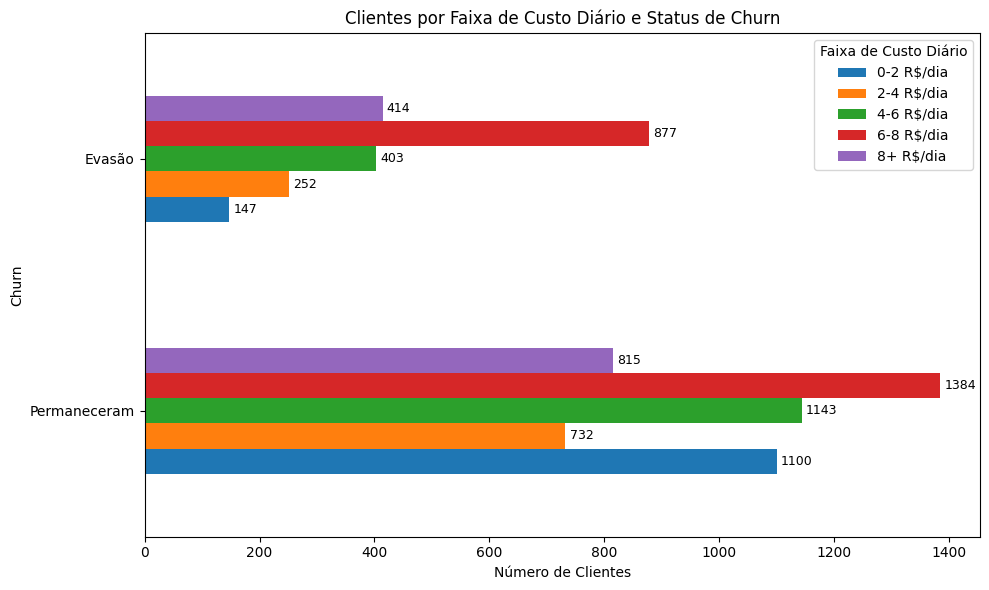

In [109]:
df["Custo Diário"] = df['Charges.Monthly'].map(lambda x: x / 12)
df["Custo Diário"] = df["Custo Diário"].round(2)

# 1. Definir faixas (bins)
bins = [0, 2, 4, 6, 8, df["Custo Diário"].max() + 1]
labels = ["0-2 R$/dia", "2-4 R$/dia", "4-6 R$/dia", "6-8 R$/dia", "8+ R$/dia"]
df["Faixa Custo Diário"] = pd.cut(df["Custo Diário"], bins=bins, labels=labels, right=False)

# 2. Contar quantos clientes em cada faixa por status de churn
faixa_counts = df.groupby(["Faixa Custo Diário", "Churn"]).size().unstack(fill_value=0)
faixa_counts.rename(columns={False: "Permaneceram", True: "Evasão"}, inplace=True)

# 3. Criar gráfico
plt.figure(figsize=(10, 6))
ax = faixa_counts.T.plot(kind="barh", figsize=(10, 6))

# 4. Títulos e rótulos
plt.title("Clientes por Faixa de Custo Diário e Status de Churn")
plt.ylabel("Churn")
plt.xlabel("Número de Clientes")
plt.legend(title="Faixa de Custo Diário")

# 5. Adiciona os valores nas barras
for container in ax.containers:
    labels = [str(int(bar.get_width())) for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=9, padding=3)

plt.tight_layout()

# Salvando como PNG
plt.savefig('Clientes por faixa de Custo diário e status de churn', dpi=300, bbox_inches='tight')

plt.show()


Relatório Final – Análise de Evasão de Clientes da Telecom

Introdução
A Telecom é uma empresa do setor de telecomunicações que vem enfrentando uma alta taxa de evasão de clientes (churn). Com o objetivo de entender os motivos dessa evasão, este projeto realizou uma análise exploratória detalhada do perfil dos clientes, seus serviços contratados e características de pagamento, visando identificar padrões relevantes que ajudem a entender o motivo da evasão (churn) com o objetivo de reduzir a perda de clientes.

Limpeza e Tratamento de Dados
O processo de preparação dos dados seguiu os seguintes passos:
  •	Importação: Os dados foram carregados a partir de um arquivo JSON hospedado no GitHub.
  •	Transformação de dados aninhados: Os campos phone, internet e account foram normalizados com json_normalize() e unidos ao DataFrame principal.
  •	Conversão de tipos: Variáveis como Churn, SeniorCitizen e serviços contratados foram convertidas para booleanos.
  •	Tratamento de valores ausentes e inválidos:
    o	Charges.Total teve valores não numéricos convertidos com to_numeric(errors='coerce') e NaNs foram substituídos por 0.
  •	Padronização de colunas: As colunas foram convertidas para os tipos corretos (int64, float64, bool), facilitando a análise.

Análise Exploratória de Dados (EDA)
Foram realizadas diversas análises e visualizações para investigar os padrões associados ao churn:
1. Distribuição Geral de Churn
  •	28,8% dos clientes saíram da empresa. A maioria dos clientes (71,2%) permaneceu.
2. Churn por Gênero
  •	Homens 29% e mulheres 28%, portanto apresentam proporções semelhantes de evasão.
3. Churn por Tipo de Contrato
  •	Clientes com contrato mensal têm 44,5% de evasão.
  •	Clientes com contrato de dois anos têm apenas 5,5% de evasão.
4.Perfil Pessoal dos Churners
  •	24,7% dos churners são idosos.
  •	Apenas 37,5% são casados.
  •	19% possuem dependentes.
5. Churn por Método de Pagamento
  •	47% dos clientes que usam débito eletrônico (electronic check) saem.
  •	Cartões de crédito automáticos e transferência bancária têm menor churn.
6. Evasão por Total de Gasto
  •	Churn é mais comum entre clientes com menor gasto total.
7. Churn por Serviço Utilizado
  •	Serviços com mais churners:
    o	Internet (1.925 churners)
    o	Telefone (1.898 churners)
    o	Streaming (TV e filmes): mais de 2.000 somando os dois.
8. Tempo de Contrato (tenure) x Churn
  •	Churn é alto nos primeiros meses, principalmente até 10 meses de contrato.
  •	Quanto maior o tempo de permanência, menor a chance de saída.
9. Criação da coluna Custo Diário e posterior comparação com a Evasão
  •	Faixas de até R$ 4/dia concentram a maior parte dos churners.
  •	Clientes com custo diário mais alto tendem a permanecer.

Conclusões e Insights
1.	Contratos mensais estão altamente associados ao churn.
2.	Clientes com menor gasto total ou custo diário tendem a sair mais.
3.	Métodos de pagamento influenciam a evasão, especialmente o débito eletrônico.
4.	Tempo de contrato curto é um forte indicativo de risco de churn.
5.	O uso de serviços digitais (streaming, internet) está fortemente presente entre os churners — pode indicar expectativa não atendida.
6.	Idosos, solteiros e sem dependentes aparecem mais entre os evasores.

Recomendações
Com base na análise, recomenda-se:
1.	Oferecer incentivos para contratos de longo prazo, como descontos progressivos.
2.	Criar planos de fidelização personalizados para novos clientes nos primeiros 6 meses.
3.	Revisar a experiência dos usuários com serviços de streaming e internet, os mais usados por quem sai.
4.	Oferecer opções de pagamento mais convenientes e menos associadas ao churn.
5.	Monitorar proativamente clientes com baixo gasto total e contratos recentes, utilizando modelos preditivos.
6.	Desenvolver campanhas segmentadas para idosos e solteiros, com serviços ajustados ao seu perfil.
